# Explore the Data

In this notebook, I opened up a lot of the databases I created in the gathering data notebook and start to manipulate it a bit more for use in my model.

In [3]:
# Import all the important stuff I might need

import scipy.stats as stats
import pandas as pd
import numpy as np
from datetime import datetime,timedelta

from sklearn.cluster import KMeans, k_means, DBSCAN
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegressionCV
from sklearn.metrics import accuracy_score, mean_squared_error, silhouette_score, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV 
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
from statsmodels.tsa.arima_model import ARMA

from datetime import datetime
from datetime import timedelta

import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from hdbscan import HDBSCAN

import bokeh
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

plt.style.use('seaborn')
sns.set(style="white")

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [85]:
# load player data
# not individual stats, but personal info
players = pd.read_csv('./data/People.csv')

#load batting data
batting = pd.read_csv('./data/Batting.csv')

#load post season batting data
batting_post = pd.read_csv('./data/BattingPost.csv')

#load pitching data
pitching = pd.read_csv('./data/Pitching.csv')

#load post season pitching data
pitching_post = pd.read_csv('./data/PitchingPost.csv')

#load salary data
salaries = pd.read_csv('./data/Salaries.csv')

#load team data
teams = pd.read_csv('./data/Teams.csv')

#load fielding data
fielding = pd.read_csv('./data/Fielding.csv')

#load post season fielding data
fielding_post = pd.read_csv('./data/FieldingPost.csv')

In [5]:
#standardize column names
batting.columns = map(str.lower, batting.columns)
batting_post.columns = map(str.lower, batting_post.columns)
pitching.columns = map(str.lower, pitching.columns)
pitching_post.columns = map(str.lower, pitching_post.columns)
salaries.columns = map(str.lower, salaries.columns)
teams.columns = map(str.lower, teams.columns)
fielding.columns = map(str.lower, fielding.columns)
fielding_post.columns = map(str.lower, fielding_post.columns)
players.columns = map(str.lower, players.columns)

In [6]:
#rename 'yearid' column to year for ease
batting.rename(columns={'yearid':'year'}, inplace=True)
batting_post.rename(columns={'yearid':'year'}, inplace=True)
pitching.rename(columns={'yearid': 'year'}, inplace=True)
pitching_post.rename(columns={'yearid': 'year'}, inplace=True)
salaries.rename(columns={'yearid': 'year'}, inplace=True)
teams.rename(columns={'yearid': 'year'}, inplace=True)
fielding.rename(columns={'yearid': 'year'}, inplace=True)
fielding_post.rename(columns={'yearid':'year'}, inplace=True)

In [7]:
# concat post and regular season stats to get a true value for career stats
batting = pd.concat([batting, batting_post], join='inner')
pitching = pd.concat([pitching, pitching_post], join='inner')
fielding = pd.concat([fielding, fielding_post], join='inner')

In [8]:
#use fillna() to replace NaN for years stat wasn't recorded
#need to figure out a way to fix pitching data, since 0 will be beneficaial in a few cases
batting.fillna(value=0, inplace=True)
batting_post.fillna(value=0, inplace=True)
pitching.fillna(value=0, inplace=True)
pitching_post.fillna(value=0, inplace=True)
teams.fillna(value=0, inplace=True)
fielding.fillna(value=0, inplace=True)
fielding_post.fillna(value=0, inplace=True)

In [9]:
batting['period'] = batting['year']
batting['period'].replace(range(1871,1901), 0, inplace=True)
batting['period'].replace(range(1901,1920), 1, inplace=True)
batting['period'].replace(range(1920, 1942), 2, inplace=True)
batting['period'].replace(range(1942, 1961), 3, inplace=True)
batting['period'].replace(range(1961, 1977), 4, inplace=True)
batting['period'].replace(range(1977, 1994), 5, inplace=True)
batting['period'].replace(range(1994, 2006), 6, inplace=True)
batting['period'].replace(range(2006, 2018), 7, inplace=True)

In [10]:
pitching['period'] = pitching['year']
pitching['period'].replace(range(1871, 1901), 0, inplace=True)
pitching['period'].replace(range(1901, 1920), 1, inplace=True)
pitching['period'].replace(range(1920, 1942), 2, inplace=True)
pitching['period'].replace(range(1942, 1961), 3, inplace=True)
pitching['period'].replace(range(1961, 1977), 4, inplace=True)
pitching['period'].replace(range(1977, 1994), 5, inplace=True)
pitching['period'].replace(range(1994, 2006), 6, inplace=True)
pitching['period'].replace(range(2006, 2018), 7, inplace=True)

In [11]:
fielding['period'] = fielding['year']
fielding['period'].replace(range(1871, 1901), 0, inplace=True)
fielding['period'].replace(range(1901, 1920), 1, inplace=True)
fielding['period'].replace(range(1920, 1942), 2, inplace=True)
fielding['period'].replace(range(1942, 1961), 3, inplace=True)
fielding['period'].replace(range(1961, 1977), 4, inplace=True)
fielding['period'].replace(range(1977, 1994), 5, inplace=True)
fielding['period'].replace(range(1994, 2006), 6, inplace=True)
fielding['period'].replace(range(2006, 2018), 7, inplace=True)

In [12]:
#remove player with fewer than 100 at bats for a given year
# will need to re-evaluate number later
batting = batting[batting['ab'] >= 100]

In [13]:
# remove players with fewer than 10 game appearances for a given year
# again, will need to re-evaluate number later
pitching = pitching[pitching['g'] >= 10]

In [14]:
# remove players with fewer than 20 outfield appearances for a given year
# will need to re-evalute later for seasons with less than 162 games.
fielding = fielding[fielding['g'] >= 20]

In [15]:
# create batting average column
# I used basic batting average formula
batting['bavg'] = batting['h']/batting['ab']

In [16]:
# create on base percentage column
batting['obp'] = (batting['h']+batting['bb']+batting['hbp']) / (batting['ab']+batting['bb']+batting['hbp']+batting['sf'])

In [17]:
# create singles column
batting['1b'] = batting['h']-(batting['2b']+batting['3b']+batting['hr'])

In [18]:
# create slugging percentage column
batting['slg'] = (batting['1b']+(2*batting['2b'])+(3*batting['3b'])+(4*batting['hr'])) / batting['ab']

In [19]:
# create on base plus slugging column
batting['ops'] = batting['obp']+batting['slg']

In [20]:
# created estimated pitch count column to see trends over time
# this is an estimate used from metrics found elsewhere
# not an offical stat until 1954
pitching['est_pc'] = 3 * (pitching['h'] + (4 * pitching['bb']) + (3 * pitching['so']) + pitching['wp'])

In [21]:
# created fielding percentage column
fielding['fp%'] = ((fielding['po']+fielding['a']) / (fielding['po']+fielding['a']+fielding['e']))

In [22]:
# created range fielding per game column
fielding['rf/g'] = (fielding['po']+fielding['a']) / fielding['g']

In [23]:
# created walks plus hits per inning pitched
pitching['whip'] = (pitching['bb']+pitching['h']) / (3*pitching['ipouts'])

In [24]:
#round batting average down to 3 significant digits to better group players
batting = round(batting, 3)
pitching = round(pitching, 3)
fielding = round(fielding, 3)

In [25]:
#replace bats and throws with numbers
players['bats'].replace({'R':1, 'L':2, 'B':3,}, inplace=True)
players['throws'].replace({'R':1, 'L':2, 'S':4}, inplace=True)

In [26]:
# We only need certain data from player dataset
# Right =1
# Left =2
#Both =3
#S =4 : find what s means
players = players.groupby('playerid').sum()
players = players[['weight', 'height', 'bats', 'throws']]

## We need major league baseball data!

I realized while doing eda that there is minor league and alternative league stats for players. While this is cool to have, we don't need it for the scope of this project. So I will create new datasets with just the NL and AL league ids.

In [27]:
batting_al = batting[batting['lgid'] == 'AL']
batting_nl = batting[batting['lgid'] == 'NL']
batting = pd.concat([batting_al, batting_nl], axis=0)

In [28]:
pitching_al = pitching[pitching['lgid'] == 'AL']
pitching_nl = pitching[pitching['lgid'] == 'NL']
pitching = pd.concat([pitching_al, pitching_nl], axis=0)

In [29]:
fielding_al = fielding[fielding['lgid'] == 'AL']
fielding_nl = fielding[fielding['lgid'] == 'NL']
fielding = pd.concat([fielding_al, fielding_nl], axis=0)

In [30]:
teams_al = teams[teams['lgid'] == 'AL']
teams_nl = teams[teams['lgid'] == 'NL']
teams_mlb = pd.concat([teams_al, teams_nl], axis=0).shape

In [31]:
salaries_al = salaries[salaries['lgid'] == 'AL']
salaries_nl = salaries[salaries['lgid'] == 'NL']
salaries = pd.concat([salaries_al, salaries_nl], axis=0)

The players individual data doesn't include teams they played for, which is fine because this dataset will be used to reference player height and weight stats.

## Let's create some new datasets for career stats and stats by year and stats for player by year

### Batting

In [32]:
batters = batting.groupby('playerid').sum()
batters.drop(columns=(['year', 'bavg', 'obp', 'ops', 'slg','period']), inplace=True)
batters['years'] = batting.groupby('playerid')['year'].count()
batters['period'] = batting.groupby('playerid')['period'].mean()
batters['bavg'] = batting.groupby('playerid')['bavg'].mean()
batters['obp'] = batting.groupby('playerid')['obp'].mean()
batters['ops'] = batting.groupby('playerid')['ops'].mean()
batters['slg'] = batting.groupby('playerid')['slg'].mean()
batters = round(batters, 3)

In [33]:
batting_year = batting.groupby('year').sum()
batting_year.drop(columns=(['bavg', 'obp', 'ops', 'slg', 'period']), inplace=True)
batting_year['period'] = batting.groupby('year')['period'].mean()
# batting_year['trades'] = batting_year['stint']
# batting_year.drop(['stint'], axis=1, inplace=True)
batting_year['bavg'] = batting.groupby('year')['bavg'].mean()
batting_year['obp'] = batting.groupby('year')['obp'].mean()
batting_year['ops'] = batting.groupby('year')['ops'].mean()
batting_year['slg'] = batting.groupby('year')['slg'].mean()
batting_year = round(batting_year, 3)

In [34]:
batters_years = batting.groupby(['playerid', 'year']).sum()
batters_years.drop(columns=(['bavg', 'obp', 'ops', 'slg', 'period']), inplace=True)
batters_years['period'] = batting.groupby(['playerid', 'year'])['period'].mean()
# # # batters['years'] = batting.groupby(['playerid', 'year'])['year'].count()
batters_years['bavg'] = batting.groupby(['playerid', 'year'])['bavg'].mean()
batters_years['obp'] = batting.groupby(['playerid', 'year'])['obp'].mean()
batters_years['ops'] = batting.groupby(['playerid', 'year'])['ops'].mean()
batters_years['slg'] = batting.groupby(['playerid', 'year'])['slg'].mean()
batters_years = round(batters_years, 3)

In [35]:
batting_team = batting.groupby(['teamid']).sum()
batting_team.drop(columns=['year', 'bavg', 'obp', 'ops', 'slg', 'period'], inplace=True)
# batting_team['years'] = batting.groupby('teamid')['year'].count()
batting_team['period'] = batting.groupby('teamid')['period'].mean()
batting_team['bavg'] = batting.groupby('teamid')['bavg'].mean()
batting_team['obp'] = batting.groupby('teamid')['obp'].mean()
batting_team['ops'] = batting.groupby('teamid')['ops'].mean()
batting_team['slg'] = batting.groupby('teamid')['slg'].mean()
batting_team = round(batting_team, 3)

In [36]:
batting_team_year = batting.groupby(['teamid', 'year']).sum()
batting_team_year.drop(columns=['bavg', 'obp', 'ops', 'slg', 'period'], inplace=True)
batting_team_year['period'] = batting.groupby(['teamid', 'year'])['period'].mean()
batting_team_year['bavg'] = batting.groupby(['teamid', 'year'])['bavg'].mean()
batting_team_year['obp'] = batting.groupby(['teamid', 'year'])['obp'].mean()
batting_team_year['ops'] = batting.groupby(['teamid', 'year'])['ops'].mean()
batting_team_year['slg'] = batting.groupby(['teamid', 'year'])['slg'].mean()
batting_team_year = round(batting_team_year,3)

### Pitching

In [37]:
pitchers = pitching.groupby('playerid').sum()
pitchers.drop(columns=(['year', 'era', 'whip', 'period']), inplace=True)
pitchers['years'] = pitching.groupby('playerid')['year'].count()
pitchers['period'] = pitching.groupby('playerid')['period'].mean()
pitchers['era'] = pitching.groupby('playerid')['era'].mean()
pitchers['whip'] = pitching.groupby('playerid')['whip'].mean()
pitchers = round(pitchers, 3)

In [38]:
pitching_year = pitching.groupby('year').sum()
pitching_year.drop(columns=(['era','whip', 'period']), inplace=True)
# pitching_year['trades'] = pitching_year['stint']
# pitching_year.drop(['stint'], axis=1, inplace=True)
pitching_year['period'] = pitching.groupby('year')['period'].mean()
pitching_year['era'] = pitching.groupby('year')['era'].mean()
pitching_year['whip'] = pitching.groupby('year')['whip'].mean()
pitching_year = round(pitching_year, 3)

In [39]:
pitchers_years = pitching.groupby(['playerid', 'year']).sum()
pitchers_years.drop(columns=(['era','whip', 'period']), inplace=True)
# batters['years'] = batting.groupby(['playerid', 'year'])['year'].count()
pitchers_years['era'] = pitching.groupby(['playerid', 'year'])['era'].mean()
pitchers_years['period'] = pitching.groupby(['playerid', 'year'])['period'].mean()
pitchers_years['era'] = pitching.groupby(['playerid', 'year'])['whip'].mean()
pitchers_years = round(pitchers_years, 3)

In [40]:
pitching_team = pitching.groupby(['teamid']).sum()
pitching_team.drop(columns=['year', 'era', 'whip', 'period'], inplace=True)
pitching_team['era'] = pitching.groupby('teamid')['era'].mean()
pitching_team['period'] = pitching.groupby('teamid')['period'].mean()
pitching_team['whip'] = pitching.groupby('teamid')['whip'].mean()
pitching_team = round(pitching_team, 3)

In [41]:
pitching_team_year = pitching.groupby(['teamid', 'year']).sum()
pitching_team_year.drop(columns=['era', 'whip', 'period'], inplace=True)
pitching_team_year['era'] = pitching.groupby(['teamid', 'year'])['era'].mean()
pitching_team_year['period'] = pitching.groupby(['teamid', 'year'])['period'].mean()
pitching_team_year['whip'] = pitching.groupby(['teamid', 'year'])['whip'].mean()
pitching_team_year = round(pitching_team_year,3)

### Fielding

In [42]:
fielders = fielding.groupby('playerid').sum()
fielders.drop(columns=(['year', 'fp%', 'rf/g','period']), inplace=True)
fielders['years'] = fielding.groupby('playerid')['year'].count()
fielders['period'] = fielding.groupby('playerid')['period'].mean()
fielders['fp%'] = fielding.groupby('playerid')['fp%'].mean()
fielders['rf/g'] = fielding.groupby('playerid')['rf/g'].mean()
fielders.fillna(value=0, inplace=True)

In [43]:
fielding_year = fielding.groupby(['year']).sum()
# fielding_year['trades'] = fielding_year['stint']
fielding_year.drop(['fp%', 'rf/g', 'period'], axis=1, inplace=True)
fielding_year['fp%'] = fielding.groupby('year')['fp%'].mean()
fielding_year['period'] = fielding.groupby('year')['period'].mean()
fielding_year['rf/g'] = fielding.groupby('year')['rf/g'].mean()
fielding_year.fillna(value=0, inplace=True)

In [44]:
fielders_years = fielding.groupby(['playerid', 'year']).sum()
fielders_years.drop(['fp%', 'rf/g','period'], axis=1, inplace=True)
fielders_years['fp%'] = fielding.groupby(['playerid','year'])['fp%'].mean()
fielders_years['period'] = fielding.groupby(['playerid', 'year'])['period'].mean()
fielders_years['rf/g'] = fielding.groupby(['playerid','year'])['rf/g'].mean()
fielders_years.fillna(value=0, inplace=True)

In [45]:
fielding_team = fielding.groupby(['teamid']).sum()
fielding_team.drop(columns=['year', 'fp%', 'rf/g','period'], inplace=True)
# batting_team['years'] = batting.groupby('teamid')['year'].count()
fielding_team['fp%'] = fielding.groupby('teamid')['fp%'].mean()
fielding_team['period'] = fielding.groupby('teamid')['period'].mean()
fielding_team['rf/g'] = fielding.groupby('teamid')['rf/g'].mean()
fielding_team = round(fielding_team, 3)

In [46]:
fielding_team_year = fielding.groupby(['teamid', 'year', 'period']).sum()
fielding_team_year.drop(columns=['fp%', 'rf/g'], inplace=True)
fielding_team_year['fp%'] = fielding.groupby(['teamid', 'year'])['fp%'].mean()
fielding_team_year['period'] = fielding.groupby(['teamid', 'year'])['period'].mean()
fielding_team_year['rf/g'] = fielding.groupby(['teamid', 'year'])['rf/g'].mean()
fielding_team_year = round(fielding_team_year,3)

In [47]:
import datetime

now = str(datetime.datetime.now())[:10]
# batting.to_csv(f'./data/batting_{now}', index=False)

In [48]:
batting.to_csv('./data/data/batting', index=True)
batters.to_csv('./data/data/batters', index=True)
batting_year.to_csv('./data/data/batting_year', index=True)
batters_years.to_csv('./data/data/batters_years', index=True)
batting_team.to_csv('./data/data/batting_team', index=True)
batting_team_year.to_csv('./data/data/batting_team_year', index=True)

pitching.to_csv('./data/data/pitching', index=True)
pitchers.to_csv('./data/data/pitchers', index=True)
pitching_year.to_csv('./data/data/pitching_year', index=True)
pitchers_years.to_csv('./data/data/pitchers_years', index=True)
pitching_team.to_csv('./data/data/pitching_team', index=True)
pitching_team_year.to_csv('./data/data/pitching_team_year', index=True)

fielding.to_csv('./data/data/fielding', index=True)
fielders.to_csv('./data/data/fielders', index=True)
fielding_year.to_csv('./data/data/fielding_year', index=True)
fielders_years.to_csv('./data/data/fielders_years', index=True)
fielding_team.to_csv('./data/data/fielding_team', index=True)
fielding_team_year.to_csv('./data/data/fielding_team_year', index=True)

## Let's scale some data for later use

In [49]:
# batting
ss = StandardScaler()
batters_ss = ss.fit_transform(batters)
batters_ss = pd.DataFrame(data=batters_ss, columns=batters.columns)
ss = StandardScaler()
batting_year_ss = ss.fit_transform(batting_year)
batting_year_ss = pd.DataFrame(data=batting_year_ss, columns=batting_year.columns)
ss = StandardScaler()
batters_years_ss = ss.fit_transform(batters_years)
batters_years_ss = pd.DataFrame(data=batters_years_ss, columns=batters_years.columns)
ss = StandardScaler()
batting_team_ss = ss.fit_transform(batting_team)
batting_team_ss = pd.DataFrame(data=batting_team_ss, columns=batting_team.columns)
ss = StandardScaler()
batting_team_year_ss = ss.fit_transform(batting_team_year)
batting_team_year_ss = pd.DataFrame(data=batting_team_year_ss, columns=batting_team_year.columns)

In [50]:
# pitching
ss = StandardScaler()
pitchers_ss = ss.fit_transform(pitchers)
pitchers_ss = pd.DataFrame(data=pitchers_ss, columns=pitchers.columns)
ss = StandardScaler()
pitching_year_ss = ss.fit_transform(pitching_year)
pitching_year_ss = pd.DataFrame(data=pitching_year_ss, columns=pitching_year.columns)
ss = StandardScaler()
pitchers_years_ss = ss.fit_transform(pitchers_years)
pitchers_years_ss = pd.DataFrame(data=pitchers_years_ss, columns=pitchers_years.columns)
ss = StandardScaler()
pitching_team_ss = ss.fit_transform(pitching_team)
pitching_team_ss = pd.DataFrame(data=pitching_team_ss, columns=pitching_team.columns)
ss = StandardScaler()
pitching_team_year_ss = ss.fit_transform(pitching_team_year)
pitching_team_year_ss = pd.DataFrame(data=pitching_team_year_ss, columns=pitching_team_year.columns)

In [51]:
# fieldings
ss = StandardScaler()
fielders_ss = ss.fit_transform(fielders)
fielders_ss = pd.DataFrame(data=fielders_ss, columns=fielders.columns)
ss = StandardScaler()
fielding_year_ss = ss.fit_transform(fielding_year)
fielding_year_ss = pd.DataFrame(data=fielding_year_ss, columns=fielding_year.columns)
ss = StandardScaler()
fielders_years_ss = ss.fit_transform(fielders_years)
fielders_years_ss = pd.DataFrame(data=fielders_years_ss, columns=fielders_years.columns)
ss = StandardScaler()
fielding_team_ss = ss.fit_transform(fielding_team)
fielding_team_ss = pd.DataFrame(data=fielding_team_ss, columns=fielding_team.columns)
ss = StandardScaler()
fielding_team_year_ss = ss.fit_transform(fielding_team_year)
fielding_team_year_ss = pd.DataFrame(data=fielding_team_year_ss, columns=fielding_team_year.columns)

## Let's look at some stats -- Basic EDA

### Batting

In [52]:
# individual batters over career
for each in batters.columns:
    print()
    print(each)
    print(batters[each].sort_values(ascending=False).head(10))


g
playerid
rosepe01     3536
yastrca01    3308
aaronha01    3298
cobbty01     3035
henderi01    3020
murraed02    3017
musiast01    3014
ripkeca01    2978
mayswi01     2973
bondsba01    2972
Name: g, dtype: int64

ab
playerid
rosepe01     13957
aaronha01    12364
yastrca01    11988
ripkeca01    11512
cobbty01     11434
murraed02    11329
jeterde01    11084
yountro01    11008
winfida01    10942
musiast01    10925
Name: ab, dtype: int64

r
playerid
henderi01    2271
cobbty01     2246
bondsba01    2219
aaronha01    2174
rosepe01     2156
ruthba01     2144
mayswi01     2054
rodrial01    2017
musiast01    1941
jeterde01    1910
Name: r, dtype: int64

h
playerid
rosepe01     4221
cobbty01     4189
aaronha01    3771
musiast01    3610
speaktr01    3511
jeterde01    3441
wagneho01    3420
yastrca01    3419
molitpa01    3309
collied01    3293
Name: h, dtype: int64

2b
playerid
speaktr01    792
rosepe01     737
cobbty01     724
musiast01    721
biggicr01    668
brettge01    663
lajoina01    657


In [53]:
for each in batters_years.columns:
    print()
    print(each)
    print(batters_years[each].sort_values(ascending=False).head(10))


g
playerid   year
willsma01  1962    165
paganjo01  1962    164
tovarce01  1967    164
santoro01  1965    164
willibi01  1965    164
bankser01  1965    163
matsuhi01  2003    163
riceji01   1978    163
oliveal01  1980    163
colavro01  1961    163
Name: g, dtype: int64

ab
playerid   year
rolliji01  2007    716
wilsowi02  1980    705
suzukic01  2004    704
samueju01  1984    701
pierrju01  2006    699
cashda01   1975    699
alouma01   1969    698
reyesjo01  2005    696
soriaal01  2002    696
jensewo01  1936    696
Name: ab, dtype: int64

r
playerid   year
hamilbi01  1894    198
ruthba01   1921    177
gehrilo01  1936    167
hamilbi01  1895    166
kellejo01  1894    165
keelewi01  1894    165
ruthba01   1928    163
gehrilo01  1931    163
keelewi01  1895    162
burkeje01  1896    160
Name: r, dtype: int64

h
playerid   year
suzukic01  2004    262
sislege01  1920    257
terrybi01  1930    254
odoulle01  1929    254
simmoal01  1925    253
hornsro01  1922    250
kleinch01  1930    250
cobbt

In [54]:
for each in batting_year.columns:
    print()
    print(each)
    print(batting_year[each].sort_values(ascending=False).head(10))


g
year
1998    46986
1999    46932
2000    46606
2003    46357
2007    46276
2002    46199
2008    46125
2005    45975
2013    45906
2001    45893
Name: g, dtype: int64

ab
year
2007    153885
1999    153319
2006    153281
1998    153208
2003    153106
2008    152878
2000    152696
2005    152641
2013    152579
2009    152514
Name: ab, dtype: int64

r
year
2000    23433
1999    23329
2006    22252
2004    21952
2007    21888
1998    21880
2001    21784
2003    21674
1996    21347
2008    21340
Name: r, dtype: int64

h
year
1999    42626
2006    42374
2000    42326
2007    42223
1998    41785
2004    41704
2003    41464
2005    41367
2008    41315
2001    41055
Name: h, dtype: int64

2b
year
2007    8684
2006    8616
2008    8528
2000    8399
2004    8385
2005    8373
2003    8354
2001    8299
1999    8298
2009    8245
Name: 2b, dtype: int64

3b
year
1921    1275
1894    1241
1912    1240
1911    1216
1930    1197
1920    1191
1901    1181
1922    1163
1913    1152
1915    1118
Name: 3

In [55]:
for each in batting_team.columns:
    print()
    print(each)
    print(batting_team[each].sort_values(ascending=False).head(10))


g
teamid
CHN    190217
PHI    187101
PIT    181506
CIN    179467
SLN    176126
DET    169008
CHA    166876
CLE    166039
BOS    165147
NYA    163007
Name: g, dtype: int64

ab
teamid
CHN    644551
PHI    629713
PIT    614525
CIN    598462
SLN    588523
DET    569736
BOS    565185
CLE    561973
CHA    559145
NYA    554351
Name: ab, dtype: int64

r
teamid
CHN    90450
PHI    84941
PIT    83259
NYA    81213
CIN    80605
SLN    80487
DET    79383
BOS    79085
CLE    76891
CHA    73882
Name: r, dtype: int64

h
teamid
CHN    175214
PHI    170074
PIT    168937
SLN    163130
CIN    162247
BOS    155120
DET    155112
CLE    153291
NYA    151748
CHA    149390
Name: h, dtype: int64

2b
teamid
CHN    29590
PHI    29447
BOS    28949
PIT    27890
SLN    27780
CIN    27468
CLE    27402
DET    26352
NYA    25197
CHA    24780
Name: 2b, dtype: int64

3b
teamid
PIT    7812
CHN    6726
SLN    6459
CIN    6315
PHI    6186
DET    5684
BOS    5117
CHA    5113
NYA    5044
CLE    4987
Name: 3b, dtype: int64

h

In [56]:
for each in batting_team_year.columns:
    print()
    print(each)
    print(batting_team_year[each].sort_values(ascending=False).head(10))


g
teamid  year
TEX     1980    1832
CHA     1983    1803
MIN     1978    1797
DET     1984    1796
BAL     1984    1793
SEA     1991    1782
KCA     1978    1779
TOR     1984    1779
TEX     1987    1776
OAK     1977    1773
Name: g, dtype: int64

ab
teamid  year
BOS     2003    5624
TEX     1998    5603
BOS     1997    5588
MIN     2009    5585
ML4     1982    5571
OAK     1988    5559
DET     1978    5559
        2000    5543
TOR     1984    5543
LAA     2005    5533
Name: ab, dtype: int64

r
teamid  year
BSN     1894    1172
PHI     1894    1159
BLN     1894    1108
PHI     1895    1034
NYA     1931    1004
BSN     1897     998
        1893     995
PHI     1893     987
NYA     1936     986
CHN     1894     982
Name: r, dtype: int64

h
teamid  year
PHI     1894    1753
        1930    1680
NY1     1930    1654
BOS     1997    1646
        2003    1634
TEX     1998    1624
SLN     1930    1602
PHI     1895    1599
CHN     1930    1597
CLE     1996    1597
Name: h, dtype: int64

2b
te

### Pitching

In [57]:
# individual pitchers over career
for each in pitchers.columns:
    print()
    print(each)
    print(pitchers[each].sort_values(ascending=False).head(10))


w
playerid
youngcy01    508
johnswa01    417
mathech01    372
alexape01    368
spahnwa01    363
nichoki01    360
clemero02    354
maddugr01    351
clarkjo01    327
ryanno01     324
Name: w, dtype: int64

l
playerid
youngcy01    312
ryanno01     291
johnswa01    279
niekrph01    272
galvipu01    267
perryga01    265
suttodo01    253
powelja01    253
rixeyep01    251
blylebe01    248
Name: l, dtype: int64

g
playerid
oroscje01    1230
stantmi02    1170
francjo01    1119
riverma01    1106
plesada01    1064
eckerde01    1062
timlimi01    1058
tekulke01    1039
wilheho01    1036
hawkila01    1029
Name: g, dtype: int64

gs
playerid
youngcy01    808
ryanno01     772
suttodo01    744
maddugr01    728
niekrph01    712
clemero02    707
johnto01     690
perryga01    690
carltst01    686
blylebe01    681
Name: gs, dtype: int64

cg
playerid
youngcy01    745
galvipu01    558
johnswa01    531
nichoki01    526
welchmi01    525
clarkjo01    483
radboch01    452
mccorji01    438
mathech01    432
alexap

In [58]:
for each in pitchers_years.columns:
    print()
    print(each)
    print(pitchers_years[each].sort_values(ascending=False).head(10))


w
playerid   year
radboch01  1884    59
clarkjo01  1885    53
           1889    49
buffich01  1884    48
radboch01  1883    48
spaldal01  1876    47
wardjo01   1879    47
galvipu01  1884    46
           1883    46
mccorji01  1880    45
Name: w, dtype: int64

l
playerid   year
colemjo01  1883    48
whitewi01  1880    42
bradlge01  1879    40
mccorji01  1879    40
cobbge01   1892    37
hutchbi01  1892    36
wiedmst01  1886    36
devliji01  1876    35
galvipu01  1880    35
donahre01  1897    35
Name: l, dtype: int64

g
playerid   year
marshmi01  1974    106
tekulke01  1979     94
torresa01  2006     94
marshmi01  1973     92
felicpe01  2010     92
tekulke01  1978     91
marshmi01  1979     90
grangwa01  1969     90
tekulke01  1987     90
broweji01  2004     89
Name: g, dtype: int64

gs
playerid   year
galvipu01  1883    75
whitewi01  1879    75
mccorji01  1880    74
radboch01  1884    73
clarkjo01  1889    72
galvipu01  1884    72
hutchbi01  1892    70
clarkjo01  1885    70
devliji01  

In [59]:
for each in pitching_year.columns:
    print()
    print(each)
    print(pitching_year[each].sort_values(ascending=False).head(10))


w
year
2005    2387
2010    2373
2001    2363
2013    2358
1999    2356
2004    2354
2000    2351
2002    2351
1998    2351
2011    2345
Name: w, dtype: int64

l
year
2005    2330
1999    2307
2010    2306
1998    2303
2000    2297
2011    2296
2001    2288
2014    2285
2013    2279
2002    2277
Name: l, dtype: int64

g
year
2017    19375
2016    19133
2015    18916
2012    18561
2014    18344
2007    18341
2013    18287
2009    18137
2008    18074
2010    18054
Name: g, dtype: int64

gs
year
2005    4702
2010    4639
1999    4630
1998    4623
2000    4607
2001    4599
2011    4593
2013    4579
2002    4579
2004    4561
Name: gs, dtype: int64

cg
year
1904    2096
1905    1903
1906    1816
1901    1806
1902    1804
1903    1787
1907    1735
1908    1606
1892    1547
1909    1538
Name: cg, dtype: int64

sho
year
1972    293
1968    278
1908    278
1909    271
1906    268
1907    267
1971    263
1976    259
1917    245
1914    243
Name: sho, dtype: int64

sv
year
2015    1289
2016    12

In [60]:
for each in pitching_team.columns:
    print()
    print(each)
    print(pitching_team[each].sort_values(ascending=False).head(10))


w
teamid
CHN    10472
NYA     9860
PIT     9836
SLN     9655
CIN     9596
PHI     9324
BOS     9149
CLE     9014
DET     8999
CHA     8906
Name: w, dtype: int64

l
teamid
PHI    10208
CHN     9775
PIT     9370
CIN     9279
SLN     8996
CHA     8622
DET     8511
CLE     8393
BOS     8336
NYA     7323
Name: l, dtype: int64

g
teamid
CHN    47822
SLN    46106
PHI    45910
PIT    45900
CIN    45150
CLE    42283
BOS    41603
CHA    41497
DET    41266
NYA    40066
Name: g, dtype: int64

gs
teamid
CHN    20321
PHI    19566
PIT    19260
CIN    18903
SLN    18690
CHA    17547
DET    17522
BOS    17457
CLE    17418
NYA    17200
Name: gs, dtype: int64

cg
teamid
CHN    7982
PHI    7349
PIT    6978
BSN    6723
CIN    6719
SLN    6539
NY1    6087
DET    6014
CLE    5874
CHA    5814
Name: cg, dtype: int64

sho
teamid
CHN    1142
PIT    1035
PHI    1011
SLN    1001
CHA     989
CIN     986
NYA     963
CLE     949
BOS     893
DET     887
Name: sho, dtype: int64

sv
teamid
NYA    3258
CIN    2986
CHA  

In [61]:
for each in pitching_team_year.columns:
    print()
    print(each)
    print(pitching_team_year[each].sort_values(ascending=False).head(10))


w
teamid  year
CHN     1906    115
SEA     2001    115
NYA     1927    110
CLE     1954    109
BAL     1969    109
NYN     1986    108
NYA     1998    108
CIN     1975    108
BAL     1970    108
PIT     1909    108
Name: w, dtype: int64

l
teamid  year
CL4     1899    120
DET     2003    117
BSN     1935    115
NYN     1962    113
HOU     2013    110
NYN     1963    109
        1965    108
ARI     2004    108
OAK     1979    108
PHI     1941    108
Name: l, dtype: int64

g
teamid  year
LAN     2016    727
WAS     2007    727
COL     2012    721
MIA     2017    715
CLE     2014    712
ARI     2016    712
COL     2015    704
SFN     2016    701
ATL     2016    698
SFN     2015    692
Name: g, dtype: int64

gs
teamid  year
SFN     1962    165
LAN     1962    165
MIN     1967    164
NYA     1968    164
CLE     1964    164
CIN     1964    163
LAN     1980    163
ML1     1963    163
NYA     1964    163
CIN     1999    163
Name: gs, dtype: int64

cg
teamid  year
BOS     1904    148
CLE     1

### Fielding

In [62]:
# individual fielding over career
for each in fielders.columns:
    print()
    print(each)
    print(fielders[each].sort_values(ascending=False).head(10))


g
playerid
rosepe01     3489
ripkeca01    2950
aaronha01    2948
cobbty01     2934
musiast01    2879
mayswi01     2876
bondsba01    2861
vizquom01    2837
robinbr01    2835
yastrca01    2805
Name: g, dtype: int64

gs
playerid
rosepe01     3412.0
ripkeca01    2943.0
aaronha01    2924.0
bondsba01    2797.0
robinbr01    2765.0
yastrca01    2762.0
henderi01    2728.0
vizquom01    2693.0
biggicr01    2690.0
yountro01    2677.0
Name: gs, dtype: float64

innouts
playerid
rosepe01     89621.0
ripkeca01    77456.0
aaronha01    77052.0
robinbr01    74377.0
bondsba01    72604.0
yastrca01    72191.0
vizquom01    71352.0
biggicr01    70592.0
yountro01    70373.0
henderi01    70293.0
Name: innouts, dtype: float64

po
playerid
becklja01    22309
ansonca01    21170
murraed02    21085
grimmch01    20566
mcinnst01    20052
koneted01    19825
vernomi01    19713
daubeja01    19634
gehrilo01    19384
kuheljo01    19208
Name: po, dtype: int64

a
playerid
maranra01    8757
smithoz01    8375
ripkeca01    816

In [63]:
for each in fielders_years.columns:
    print()
    print(each)
    print(fielders_years[each].sort_values(ascending=False).head(10))


g
playerid   year
gilliji01  1962    203
cantujo01  2008    195
tenacge01  1975    193
perezto01  1971    192
coninje01  1993    190
gallemi01  1991    190
tovarce01  1968    188
zobribe01  2013    188
demetdo01  1963    188
mcauldi01  1967    188
Name: g, dtype: int64

gs
playerid   year
willibi01  1965    164.0
willsma01  1962    164.0
paganjo01  1962    164.0
santoro01  1965    164.0
willibi01  1968    163.0
zeileto01  1996    163.0
rosepe01   1974    163.0
cardele01  1964    163.0
robinbr01  1964    163.0
           1962    162.0
Name: gs, dtype: float64

innouts
playerid   year
russebi01  1973    4469.0
bandosa01  1969    4442.0
morenom01  1979    4438.0
alomasa01  1971    4434.0
willibi01  1965    4416.0
santoro01  1965    4416.0
garvest01  1976    4394.0
hansero02  1965    4391.0
perezto01  1968    4390.0
gonzaad01  2007    4388.0
Name: innouts, dtype: float64

po
playerid   year
donahji02  1907    1846
kellyge01  1920    1759
todtph01   1926    1755
pippwa01   1926    1710
don

In [64]:
for each in fielding_year.columns:
    print()
    print(each)
    print(fielding_year[each].sort_values(ascending=False).head(10))


g
year
2017    57693
2007    57351
2016    57187
2015    57164
2013    57120
2008    57039
2012    56974
2009    56918
2006    56677
2005    56662
Name: g, dtype: int64

gs
year
1998    41191.0
2005    41061.0
1999    41050.0
2003    40836.0
2000    40723.0
2009    40654.0
2011    40649.0
2013    40648.0
2001    40647.0
2006    40609.0
Name: gs, dtype: float64

innouts
year
1998    1103398.0
2013    1095719.0
2005    1094326.0
1999    1093260.0
2011    1091548.0
2003    1090055.0
2009    1088090.0
2007    1087083.0
2001    1086905.0
2000    1086631.0
Name: innouts, dtype: float64

po
year
2013    123234
1998    123061
2000    122984
2005    122795
2003    122656
2009    122573
1999    122468
2012    122371
2006    122102
2011    122088
Name: po, dtype: int64

a
year
1998    47799
2003    46539
2005    46490
1999    46054
2000    45814
2002    45679
2006    45632
2001    45624
2004    45578
2007    45405
Name: a, dtype: int64

e
year
1892    4876.0
1901    4671.0
1894    4276.0
1904   

In [65]:
for each in fielding_team.columns:
    print()
    print(each)
    print(fielding_team[each].sort_values(ascending=False).head(10))


g
teamid
CHN    217295
PHI    210284
PIT    206639
CIN    204871
SLN    203860
CHA    189785
DET    188116
CLE    187495
BOS    186552
NYA    183497
Name: g, dtype: int64

gs
teamid
PHI    86429.0
CHA    86406.0
BAL    86324.0
CHN    86181.0
DET    86180.0
SLN    86127.0
BOS    86111.0
PIT    86106.0
CIN    85987.0
NYA    85456.0
Name: gs, dtype: float64

innouts
teamid
CHN    2947246.0
PHI    2830834.0
PIT    2725811.0
CIN    2651191.0
SLN    2580492.0
CHA    2313568.0
BAL    2313074.0
BOS    2304672.0
DET    2301223.0
NYA    2292192.0
Name: innouts, dtype: float64

po
teamid
CHN    535371
PHI    520550
PIT    512298
CIN    502465
SLN    493319
CHA    467043
DET    464725
BOS    463512
CLE    462326
NYA    456160
Name: po, dtype: int64

a
teamid
CHN    233580
PIT    219158
PHI    217880
SLN    209865
CIN    209806
CHA    197557
DET    192804
BOS    191994
CLE    190905
NYA    185227
Name: a, dtype: int64

e
teamid
CHN    26481.0
PHI    23778.0
PIT    22350.0
SLN    20200.0
CIN    199

In [66]:
for each in fielding_team_year.columns:
    print()
    print(each)
    print(fielding_team_year[each].sort_values(ascending=False).head(10))


g
teamid  year  period
HOU     2007  7         2101
PIT     2015  7         2099
CHN     2017  7         2097
TBA     2013  7         2095
HOU     2006  7         2090
CHN     1998  6         2080
SLN     2012  7         2074
        2009  7         2071
CHN     2016  7         2070
        2001  6         2065
Name: g, dtype: int64

gs
teamid  year  period
HOU     1971  4         1452.0
TOR     1984  5         1448.0
MIN     1969  4         1445.0
        1979  5         1443.0
BAL     1982  5         1442.0
SLN     2012  7         1442.0
ARI     2005  6         1439.0
LAN     1973  4         1438.0
CIN     1976  4         1438.0
DET     1965  4         1438.0
Name: gs, dtype: float64

innouts
teamid  year  period
MIN     1969  4         39784.0
LAN     1973  4         39524.0
CIN     1976  4         39020.0
LAN     1962  4         38861.0
        1975  4         38822.0
PHI     1993  5         38782.0
ATL     1974  4         38780.0
LAA     2005  6         38738.0
PIT     1979  5   

We have a problem. I need to decide how to deal with minor league stats...

Let's look at the team dataframe and see if I can easily filter that out.

There is! We want to just keep data from NL and AL. Then I will run career numbers for top batting average and see if my data is closer to that of popular and credible online databases

Even after taking out minor league stats and add in post season stats for players, I am still having the same issue with outliers. I did a deeper dive and found out I was dealing with pitchers. What was mainly happening was that when I remove stats from players who didn't play enough, players who played enough on some years over others have skewed data because it isn't a true measure of all their batting averages.

In [67]:
# max batting average for each year
batting.groupby('year').max()[['bavg']].T

year,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
bavg,0.429,0.387,0.358,0.357,0.36,0.399,0.368,0.374,0.354,0.371,...,0.396,0.365,0.359,0.344,0.362,0.348,0.341,0.338,0.348,0.346


In [68]:
batting.groupby('year').max()[['hr']].T

year,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
hr,5,4,4,9,6,8,7,10,27,11,...,48,47,54,43,44,53,40,47,47,59


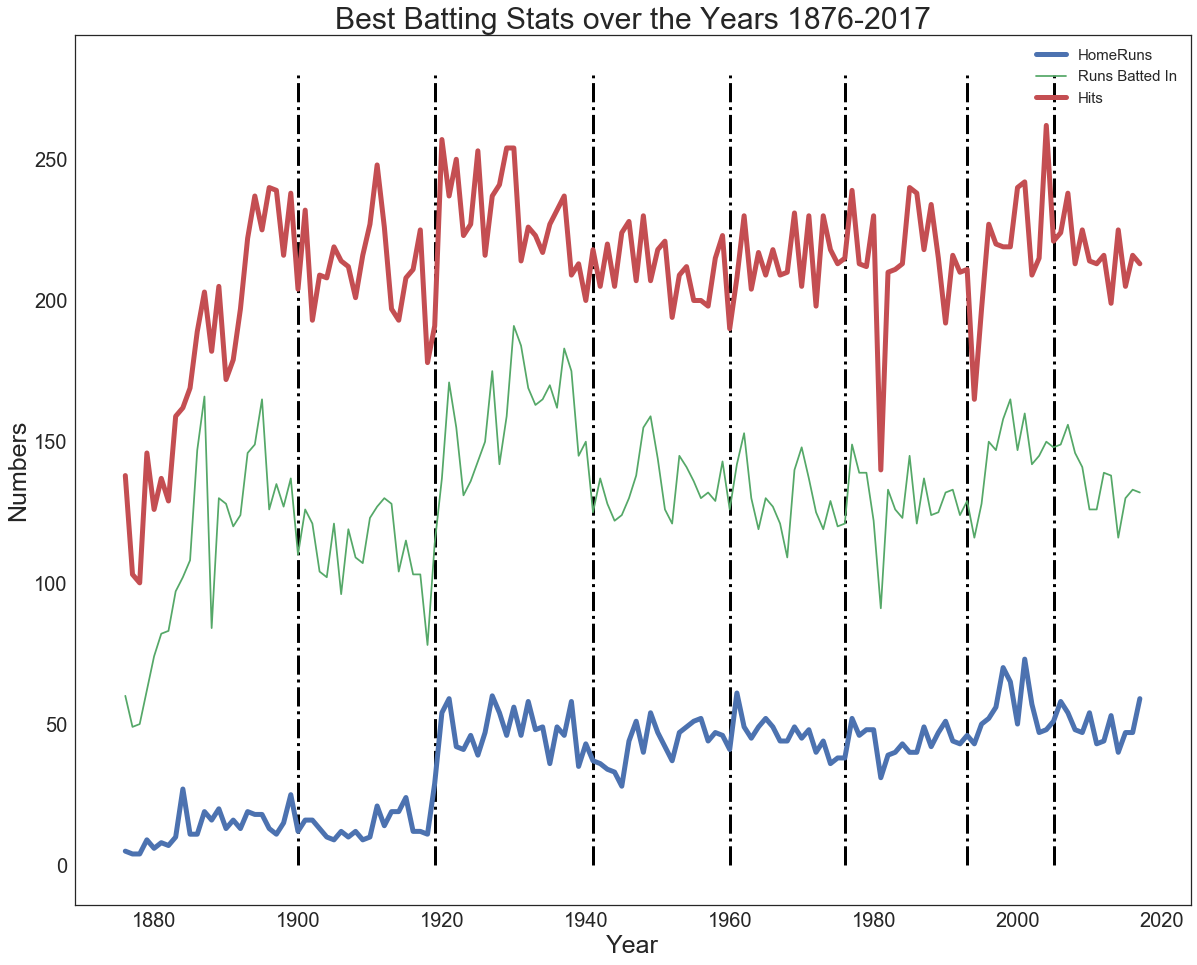

In [69]:
# plotted means hitting stats by year in matplotlib
plt.figure(figsize=(20,16))
plt.plot(batting.groupby('year').max()[['hr']], label='HomeRuns', linewidth=5)
plt.plot(batting.groupby('year').max()[['rbi']], label='Runs Batted In')
plt.plot(batting.groupby('year').max()[['h']], label='Hits', linewidth=5)
plt.vlines(x=1900, ymin=0, ymax=280, linestyles='dashdot', lw=3)
plt.vlines(x=1919, ymin=0, ymax=280, linestyles='dashdot', lw=3)
plt.vlines(x=1941, ymin=0, ymax=280, linestyles='dashdot', lw=3)
plt.vlines(x=1960, ymin=0, ymax=280, linestyles='dashdot', lw=3)
plt.vlines(x=1976, ymin=0, ymax=280, linestyles='dashdot', lw=3)
plt.vlines(x=1993, ymin=0, ymax=280, linestyles='dashdot', lw=3)
plt.vlines(x=2005, ymin=0, ymax=280, linestyles='dashdot', lw=3)
plt.title('Best Batting Stats over the Years 1876-2017', fontsize=30)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Numbers', fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.tick_params(axis= 'both',
               which= 'major',
               direction= 'in')
plt.legend(fontsize=15);

In [70]:
batters_years.index[0]

('aaronha01', 1954)

In [84]:
batters['']

,g,ab,r,h,2b,3b,hr,rbi,sb,cs,...,sh,sf,gidp,1b,years,period,bavg,obp,ops,slg
playerid,,,,,,,,,,,,,,,,,,,,,
aaronha01,3298,12364,2174,3771,624,98,755,2297.0,240.0,73.0,...,21.0,121.0,328.0,2294,23,3.696,0.301,0.372,0.920,0.548
aaronto01,311,752,81,173,36,6,10,78.0,9.0,7.0,...,9.0,6.0,26.0,121,3,4.000,0.225,0.288,0.610,0.322
abbated01,788,2852,333,728,95,43,10,294.0,136.0,0.0,...,90.0,0.0,0.0,580,6,1.000,0.254,0.322,0.645,0.323
abbeych01,452,1756,307,493,67,46,19,280.0,93.0,0.0,...,19.0,0.0,0.0,361,5,0.000,0.274,0.344,0.732,0.388
abbotfr01,160,513,48,107,21,6,1,49.0,14.0,0.0,...,20.0,0.0,0.0,79,3,1.000,0.200,0.241,0.509,0.268


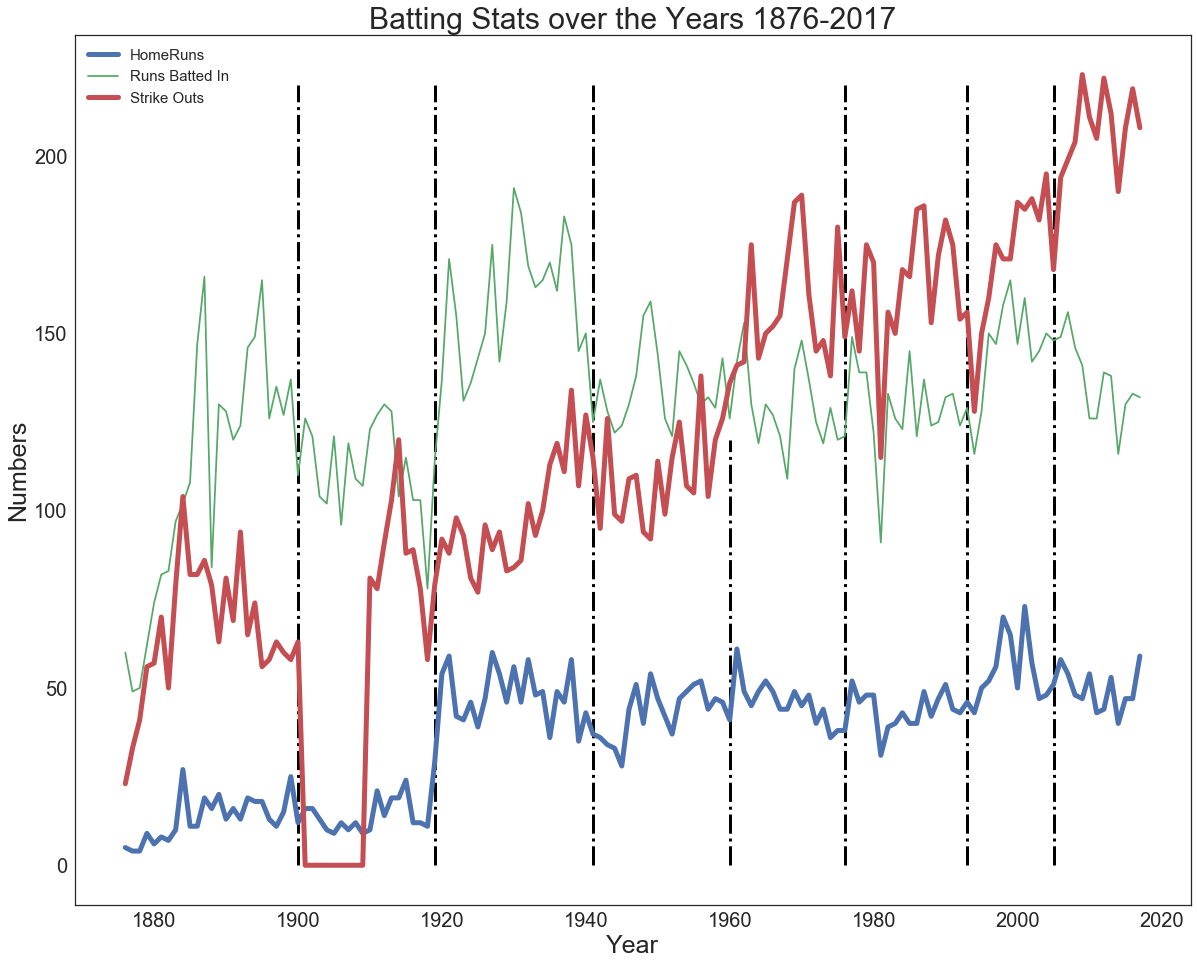

In [68]:
# plotted max hitting stats by year in matplotlib
plt.figure(figsize=(20,16))
plt.plot(batting.groupby('year').max()[['hr']], label='HomeRuns', linewidth=5)
plt.plot(batting.groupby('year').max()[['rbi']], label='Runs Batted In')
plt.plot(batting.groupby('year').max()[['so']], label='Strike Outs', linewidth=5)
plt.vlines(x=1900, ymin=0, ymax=220, linestyles='dashdot', lw=3)
plt.vlines(x=1919, ymin=0, ymax=220, linestyles='dashdot', lw=3)
plt.vlines(x=1941, ymin=0, ymax=220, linestyles='dashdot', lw=3)
plt.vlines(x=1960, ymin=0, ymax=120, linestyles='dashdot', lw=3)
plt.vlines(x=1976, ymin=0, ymax=220, linestyles='dashdot', lw=3)
plt.vlines(x=1993, ymin=0, ymax=220, linestyles='dashdot', lw=3)
plt.vlines(x=2005, ymin=0, ymax=220, linestyles='dashdot', lw=3)
plt.title('Batting Stats over the Years 1876-2017', fontsize=30)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Numbers', fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.tick_params(axis= 'both',
               which= 'major',
               direction= 'in')
plt.legend(fontsize=15);

<BarContainer object of 25 artists>

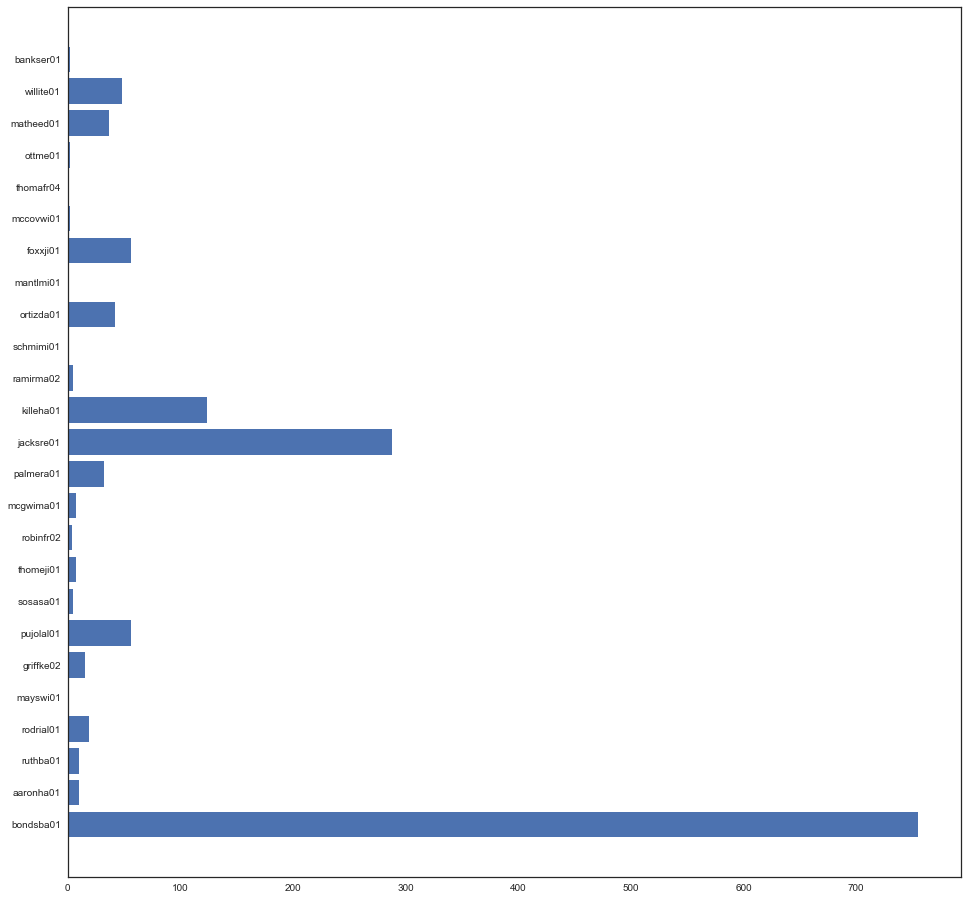

In [69]:
plt.figure(figsize=(16,16))
plt.barh(y=batters['hr'].sort_values(ascending=False)[:25].index,
         width=batters['hr'].head(25))

In [70]:
batters['hr'].sort_values(ascending=False)[:10].index

Index(['bondsba01', 'aaronha01', 'ruthba01', 'rodrial01', 'mayswi01',
       'griffke02', 'pujolal01', 'sosasa01', 'thomeji01', 'robinfr02'],
      dtype='object', name='playerid')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


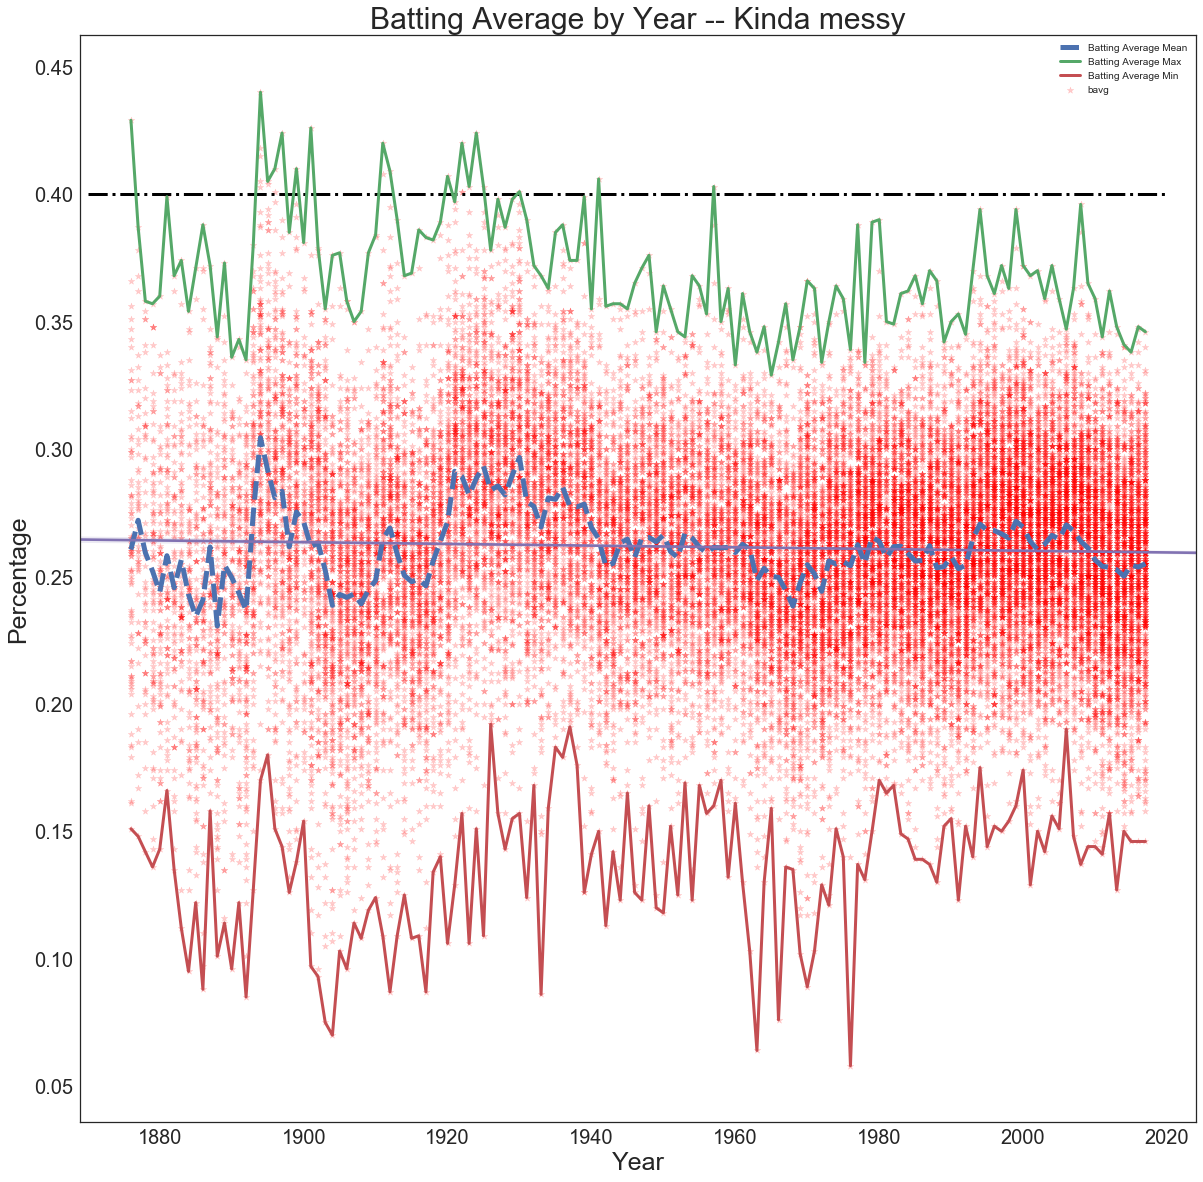

In [71]:
# taking it a step up
# plotting of batting average mean, max, and min with scatter

plt.figure(figsize=(20,20))
plt.scatter(batting['year'],
            batting['bavg'],
            marker='*',
            c='r',
            alpha=.2)
plt.plot(batting.groupby('year').mean()[['bavg']],
        lw=5, linestyle='--', label='Batting Average Mean')
plt.plot(batting.groupby('year').max()[['bavg']],
        lw=3, linestyle='-', label='Batting Average Max')
plt.plot(batting.groupby('year').min()[['bavg']],
        lw=3, linestyle='-', label='Batting Average Min')
ax = sns.regplot(x=batting['year'], y=batting['bavg'],
                scatter=False, logistic=False, order=1)
# bx = sns.residplot(x=batting['year'],
#                  y=batting['bavg'])
plt.hlines(y=0.4, xmin=1870, xmax=2020, linestyles='dashdot', lw=3)
plt.title('Batting Average by Year -- Kinda messy', fontsize=30)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Percentage', fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.tick_params(axis= 'both',
               which= 'major',
               direction= 'in')
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


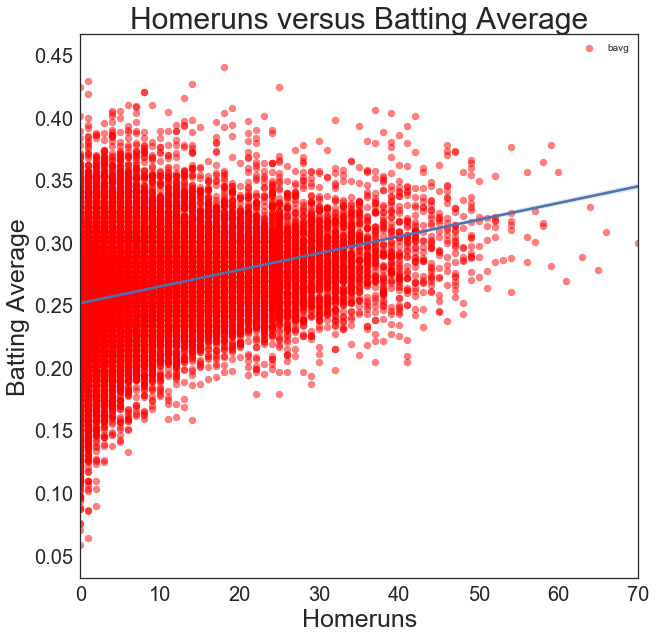

In [72]:
# plotting of batting average by hrs with a linear regression line.
plt.figure(figsize=(10,10))
plt.xlim([0,70])
plt.scatter(batting['hr'],
            batting['bavg'],
            marker='o',
            c='r',
            alpha=.5)
ax = sns.regplot(x=batting['hr'],
                 y=batting['bavg'],
                scatter=False,
                logistic=False,
                order=1,
                ci=95)
plt.title('Homeruns versus Batting Average', fontsize=30)
plt.xlabel('Homeruns', fontsize=25)
plt.ylabel('Batting Average', fontsize=25)
plt.tick_params(axis= 'both',
               which= 'major',
               direction= 'in')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text xticklabel objects>)

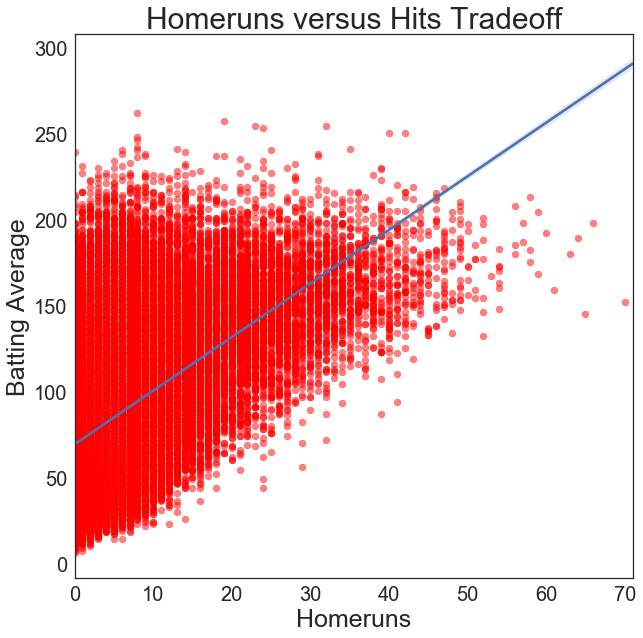

In [73]:
# plotting of batting average by hrs with a linear regression line.
plt.figure(figsize=(10,10))
plt.xlim([0,71])
plt.scatter(batting['hr'],
            batting['h'],
            marker='o',
            c='r',
            alpha=.5)
ax = sns.regplot(x=batting['hr'],
                 y=batting['h'],
                scatter=False,
                logistic=False,
                order=1,
                ci=95)
plt.title('Homeruns versus Hits Tradeoff', fontsize=30)
plt.xlabel('Homeruns', fontsize=25)
plt.ylabel('Batting Average', fontsize=25)
plt.tick_params(axis= 'both',
               which= 'major',
               direction= 'in')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


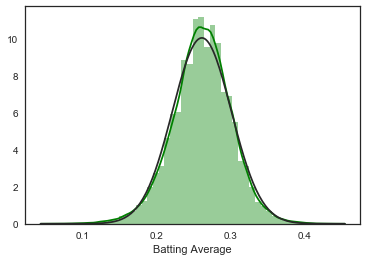

In [74]:
ax = sns.distplot(batting['bavg'],
                  hist=True,
            color = 'g',
            axlabel='Batting Average',
            fit= stats.norm)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<function matplotlib.pyplot.show(*args, **kw)>

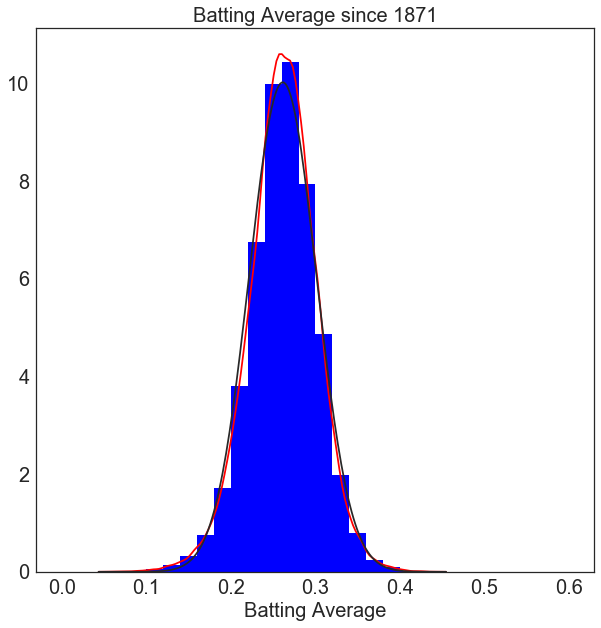

In [75]:
plt.figure(figsize=(10,10))
ax = sns.distplot(batting['bavg'],
                  hist=False,
            color = 'r',
            axlabel='Batting Average',
            fit= stats.norm)
plt.hist(batting['bavg'],
        range=(0.000, 0.600),
        bins=30,
        histtype='bar',
         normed=True,
        color='blue')

plt.title('Batting Average since 1871', fontsize=20)
plt.xlabel('Batting Average', fontsize=20)
plt.tick_params(axis= 'both',
               which= 'major',
               direction= 'in')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show

In [76]:
batting.groupby('year')['bavg'].mean().T

year
1876    0.260557
1877    0.272037
1878    0.259339
1879    0.252116
1880    0.243837
1881    0.258138
1882    0.245565
1883    0.256460
1884    0.242945
1885    0.234216
1886    0.240782
1887    0.261556
1888    0.230550
1889    0.254454
1890    0.249624
1891    0.243500
1892    0.236739
1893    0.274665
1894    0.304440
1895    0.291714
1896    0.280861
1897    0.283432
1898    0.261640
1899    0.275283
1900    0.271409
1901    0.261730
1902    0.263088
1903    0.252433
1904    0.238640
1905    0.242930
          ...   
1988    0.253396
1989    0.253849
1990    0.257767
1991    0.253062
1992    0.254334
1993    0.264776
1994    0.270525
1995    0.268071
1996    0.267968
1997    0.266707
1998    0.265057
1999    0.271670
2000    0.269345
2001    0.263743
2002    0.260565
2003    0.262686
2004    0.266123
2005    0.264671
2006    0.270241
2007    0.267891
2008    0.263790
2009    0.261186
2010    0.256466
2011    0.253976
2012    0.253576
2013    0.252612
2014    0.250086
2015    0

In [77]:
batting[['year', 'bavg']].T

,8110,8113,8118,8122,8127,8132,8133,8138,8140,8141,...,104251,104266,104272,104279,104287,104292,104293,104309,104320,104321
year,1901.00,1901.000,1901.000,1901.000,1901.000,1901.000,1901.00,1901.000,1901.000,1901.000,...,2017.000,2017.000,2017.000,2017.000,2017.000,2017.00,2017.000,2017.000,2017.000,2017.000
bavg,0.33,0.293,0.289,0.187,0.293,0.268,0.31,0.225,0.206,0.264,...,0.267,0.226,0.225,0.288,0.298,0.24,0.285,0.282,0.303,0.232


<function matplotlib.pyplot.show(*args, **kw)>

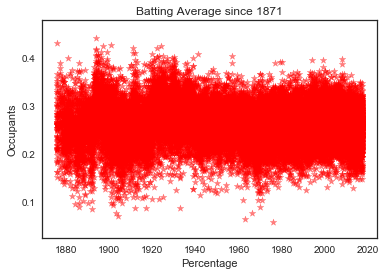

<Figure size 2160x2160 with 0 Axes>

In [78]:
plt.scatter(batting['year'],batting['bavg'],
           c='r',
           marker='*',
           vmin=.2,
           vmax=.5,
           alpha=.5)
plt.title('Batting Average since 1871')
plt.xlabel('Percentage')
plt.ylabel('Occupants')
plt.figure(figsize=(30,30))
plt.show

In [79]:
batting_by_year = batting.groupby('year').sum()

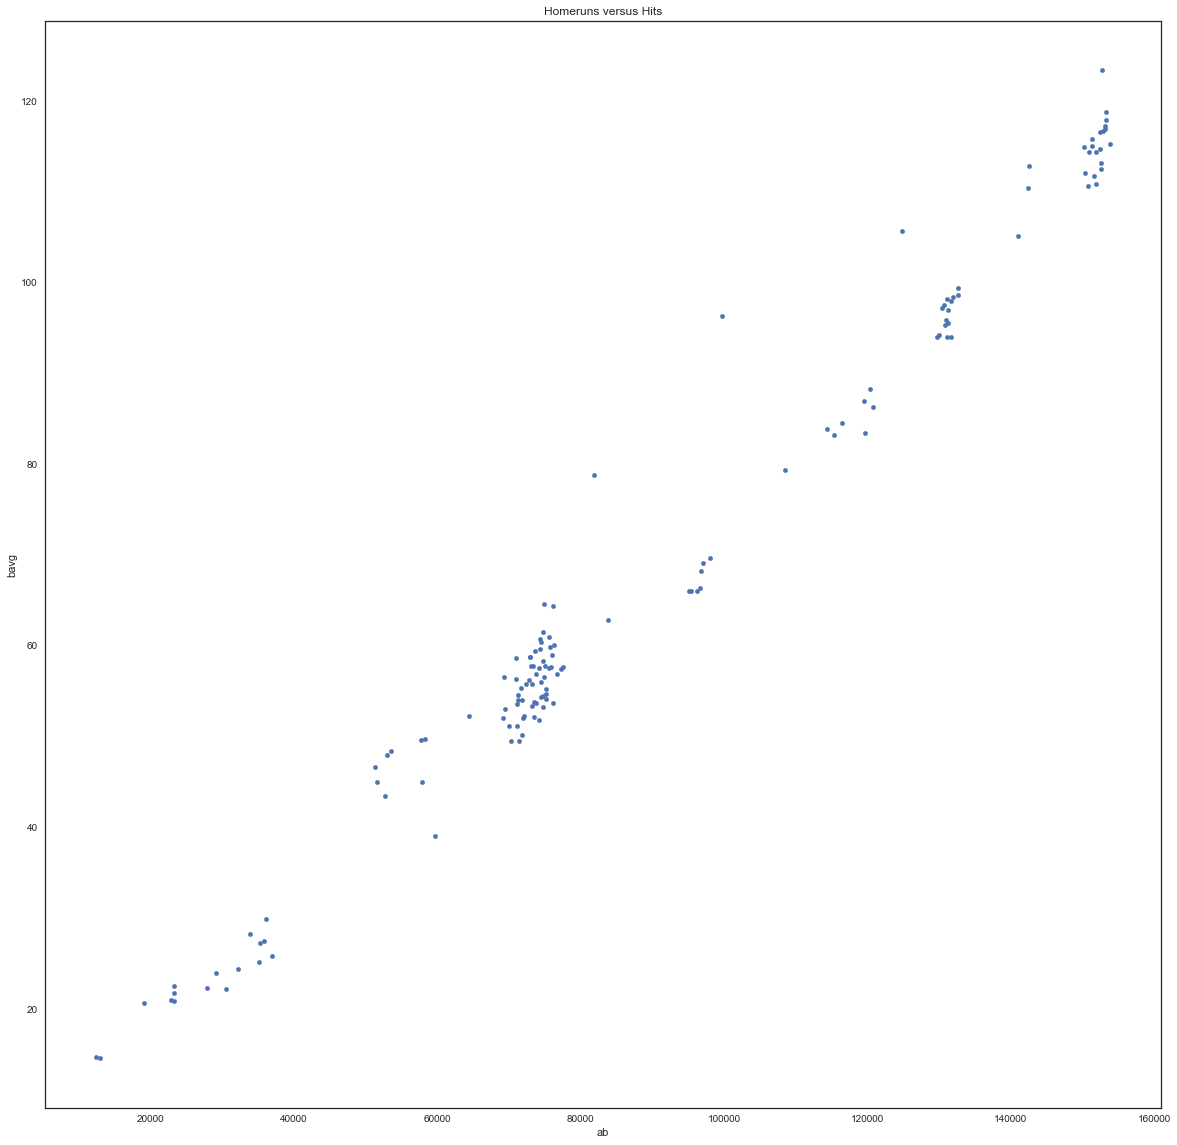

In [80]:
batting_by_year.plot('ab', 'bavg',
                     kind='scatter',
                    figsize=(20,20),
                    title= 'Homeruns versus Hits'
                    )

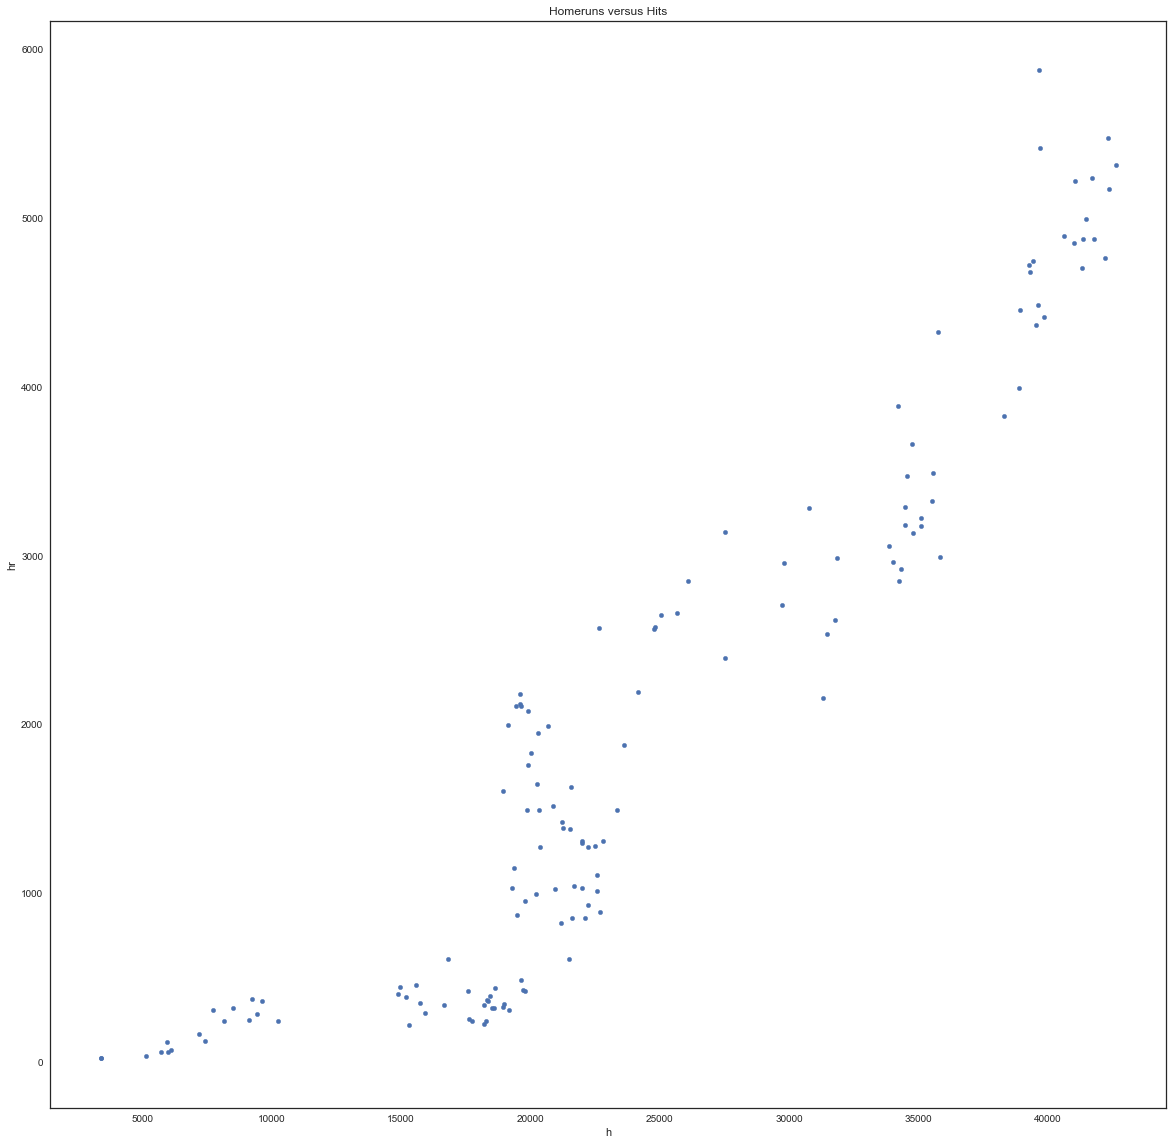

In [81]:
batting_by_year.plot('h', 'hr',
                     kind='scatter',
                    figsize=(20,20),
                    title= 'Homeruns versus Hits'
                    )

## Let's look at some pitching stats!!!

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


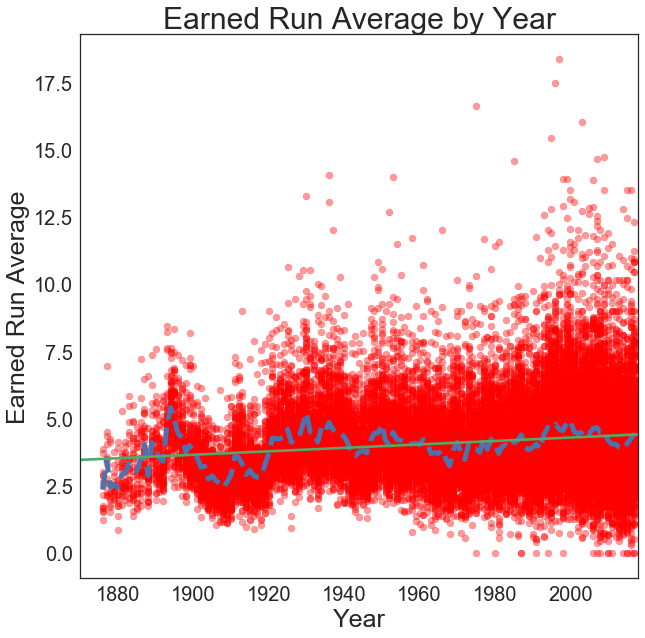

In [82]:
# taking it a step up
# plotting of batting average mean, max, and min with scatter

plt.figure(figsize=(10,10))
plt.xlim([1870,2018])
plt.scatter(pitching['year'],
            pitching['era'],
            marker='o',
            c='r',
            alpha=.4)
plt.plot(pitching.groupby('year').mean()[['era']],
        lw=5,
        linestyle='--')

ax = sns.regplot(x=pitching['year'],
                 y=pitching['era'],
                scatter=False,
                logistic=False,
                order=1,
                ci=95)
plt.title('Earned Run Average by Year', fontsize=30)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Earned Run Average', fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.tick_params(axis= 'both',
               which= 'major',
               direction= 'in')

## A look at career pitching stats